In [ ]:
import numpy as np
from pandas import read_csv
from keras.models import Sequential
import pandas as pd
from keras.layers import Conv1D,MaxPooling1D,Dense,Flatten,Dropout,LSTM,Bidirectional

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils import plot_model
import keras
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# set seed to reproduce similar results
np.random.seed(0)

In [ ]:
features_df = pd.read_csv('/content/UCI HAR Dataset/features.txt',sep="\s+",
                         header=None, names=["column_index", "column_name"])

feature_names = features_df["column_name"].values.tolist()


In [ ]:
path = "/content/UCI HAR Dataset/"

X_train = pd.read_csv(path+"train/X_train.txt",sep="\s+", header = None)
X_train.columns = feature_names
X_test = pd.read_csv(path+"test/X_test.txt",sep="\s+", header = None)
X_test.columns = feature_names
y_train = pd.read_csv(path+"train/y_train.txt",sep="\s+", header = None)
y_train.columns = ['action']
y_test = pd.read_csv(path+"test/y_test.txt",sep="\s+", header = None)
y_test.columns = ['action']



In [ ]:
batch_size = 64
validation_split = 0.2

In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [ ]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [ ]:
X_train, y_train = split_sequences(train_set, 3)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 3)
print(X_test.shape, y_test.shape)


(7350, 3, 561) (7350,)
(2945, 3, 561) (2945,)


In [ ]:
y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)


(7350, 7)
(2945, 7)


In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)


3 561 7


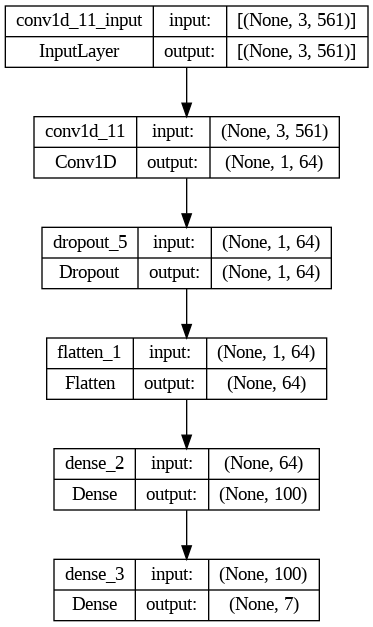

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
train_epochs = 20
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_split=validation_split, shuffle=True)

Epoch 1/20
92/92 [==============================] - 2s 10ms/step - loss: 0.9603 - accuracy: 0.5869 - val_loss: 0.4596 - val_accuracy: 0.7776
Epoch 2/20
92/92 [==============================] - 1s 7ms/step - loss: 0.4815 - accuracy: 0.7951 - val_loss: 0.3586 - val_accuracy: 0.8980
Epoch 3/20
92/92 [==============================] - 1s 7ms/step - loss: 0.3680 - accuracy: 0.8435 - val_loss: 0.2477 - val_accuracy: 0.9211
Epoch 4/20
92/92 [==============================] - 1s 8ms/step - loss: 0.3158 - accuracy: 0.8685 - val_loss: 0.2672 - val_accuracy: 0.9102
Epoch 5/20
92/92 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.8915 - val_loss: 0.2736 - val_accuracy: 0.9095
Epoch 6/20
92/92 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.9054 - val_loss: 0.1873 - val_accuracy: 0.9272
Epoch 7/20
92/92 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9112 - val_loss: 0.1771 - val_accuracy: 0.9327
Epoch 8/20
92/92 [=

In [ ]:
# evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy", test_accuracy)

Accuracy of the CNN model 0.9314091801643372
93/93 [==============================] - 0s 2ms/step
